In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

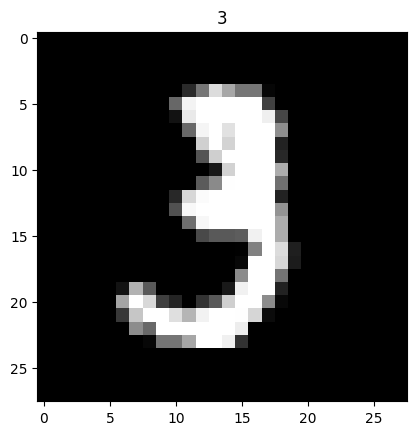

In [4]:
plt.imshow(X_train[10], cmap="gray")
plt.title(y_train[10])
plt.show()

In [5]:
X_train= X_train.reshape((-1,28,28,1))
X_test= X_test.reshape((-1,28,28,1))

**Creating Model**

In [6]:
 from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten

In [7]:
from keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=4, kernel_size= (5,5),activation="relu" , input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=4, kernel_size= (7,7),activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['acc'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 4)           │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 4)             │             788 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 3, 3, 4)             │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,262 (4.93 KB)

 Trainable params: 1,262 (4.93 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(X_train, y_train, epochs=1, batch_size=1)

60000/60000 ━━━━━━━━━━━━━━━━━━━━ 132s 2ms/step - acc: 0.7354 - loss: 0.9380


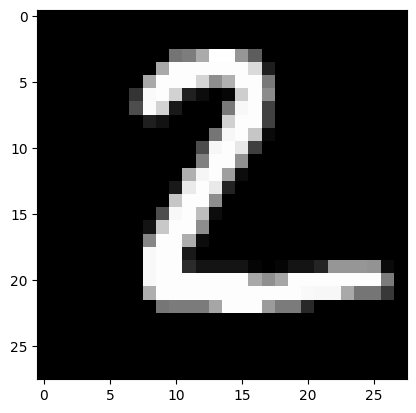

In [17]:
plt.imshow(X_test[1], cmap="gray")
plt.show()

In [18]:
test =  X_test[1].reshape(-1,28,28,1)

In [19]:
prediction= model.predict(test)
predicted_class = np.argmax(prediction)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: 2


In [22]:
model.save("/content/drive/MyDrive/temp/model.h5")

In [23]:
from google.colab import files
import shutil

In [24]:
shutil.make_archive('/content/model', 'zip', '/content/drive/MyDrive/temp/model.h5')

'/content/model.zip'

In [25]:
files.download('/content/model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>